# Minera OilyGiant

# Contents<a id='back'></a>

* [Introducción](#intro)
* [Inicialización](#inicializacion)
* [Cargando datos](#cargando_datos)
* [Explorando los datos](#explorando_datos_iniciales)
* [Modelos de entrenamiento](#modelos_de_entrenamiento)
* [Prepárando el cálculo para las ganancias](#preparando_el_cálculo_para_las_ganancias)
* [Ganancia de los 200 pozos](#ganancia_de_los_200_pozos)
* [Calculo de riesgos y ganancias para cada región](#calculo_de_riesgos_y_ganancias_para_cada_región)
* [Conclusión general](#end)

## Introducción <a id='intro'></a>
**Propósito del proyecto**
    
   Encontrar un nuevo pozo en una región con el mayor margen de beneficio.

### Objetivos:
1. Recolectar los parámetros del pozo de petróleo en la región seleccionada;
2. Construir un modelo para predecir el volumen de reservas en los nuevos pozos;
3. Seleccionar los pozos de petróleo con los valores estimados más altos;
4. Escoger la región con el mayor beneficio total para los pozos de petróleo seleccionados.

[Volver a Contenidos](#back)

## Inicialización <a id='inicializacion'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from scipy import stats as st
import seaborn as sns

[Volver a Contenidos](#back)

## Cargando los datos <a id='cargando_datos'></a>

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
df1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
df2 = pd.read_csv('/datasets/geo_data_2.csv')

[Volver a Contenidos](#back)

## Explorando los datos <a id='explorando_datos_iniciales'></a>

**Descripción de datos**

**Tabla Megaline**
- `id` —  identificador único de pozo de petróleo,
- `f0, f1, f2` —  tres características de los puntos,
- `product` —  volumen de reservas en el pozo de petróleo (miles de barriles).

In [5]:
df0.shape

(100000, 5)

In [6]:
df1.shape

(100000, 5)

In [7]:
df2.shape

(100000, 5)

In [8]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [14]:
# Imprime una muestra de los datos para los planes
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [15]:
# Imprime una muestra de los datos para los planes
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [16]:
# Imprime una muestra de los datos para los planes
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Valores ausentes**

In [17]:
df0.isna().sum().sort_values(ascending=False)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
df1.isna().sum().sort_values(ascending=False)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
df2.isna().sum().sort_values(ascending=False)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Valores duplicados**

In [20]:
len(df0.drop_duplicates()) == len (df0)

True

In [21]:
len(df1.drop_duplicates()) == len (df1)

True

In [22]:
len(df2.drop_duplicates()) == len (df2)

True

**Conclusión intermedia**
 - **`DataFrame X** — las tres tablas tienen 5 columnas, 100.000 filas. Sin valores ausentes, ni duplicados.
 
 [Volver a Contenidos](#back)

## **Modelos de entrenamiento**  <a id='modelos_de_entrenamiento'></a>

### **Modelo LR - Región 1**

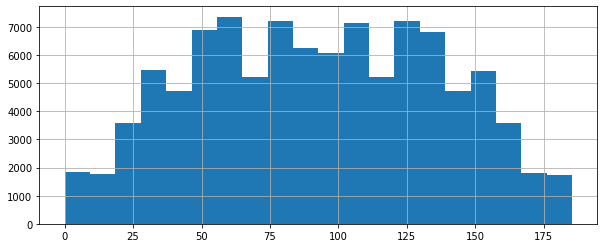

In [23]:
df0["product"].hist(figsize=(10, 4), bins=20)
plt.show()

In [24]:
#Features excluding 'product', 'id'
features0 = df0.drop(['product', 'id'], axis=1)

In [25]:
#Target
target0 = df0["product"]

In [26]:
# División de datos en conjuntos de entrenamiento y validación
random_state = 200

X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(features0,
                                                    target0,
                                                    test_size=0.25,
                                                    random_state=random_state)

In [27]:
#Definiendo y entrenando el modelo
linear_0_model = LinearRegression(fit_intercept = True)
linear_0_model.fit(X_0_train, y_0_train)

LinearRegression()

In [28]:
# Predicción
linear_predictions_0 = linear_0_model.predict(X_0_valid)
linear_predictions_0_series = pd.Series(linear_predictions_0, name='prediction')

In [29]:
print(f"""
Volumen promedio de las reservas: {round(df0["product"].mean(), 4)}
""")
print(f"""
Linear Model RMSE: {round(mean_squared_error(y_0_valid, linear_predictions_0)**(1/2), 4)}
""")


Volumen promedio de las reservas: 92.5


Linear Model RMSE: 37.7213



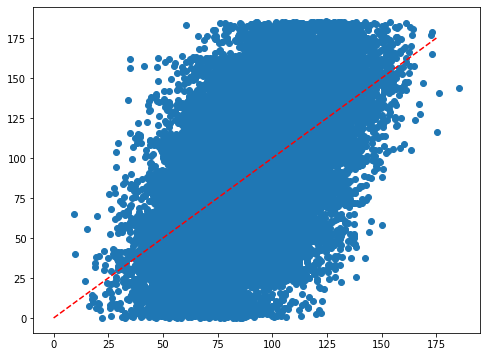

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(x=linear_predictions_0, y=y_0_valid)
plt.plot([0, 175], [0, 175], color="red", ls="--")
plt.show()
# predicciones vs valor verdadero, y es recta en promedio le estamos pegando al valor verdadero

In [31]:
37.7213 / 92.5 * 100

40.779783783783785

**Conclusión intermedia**
 - El RMSE es alto, en un 40% aprox. al valor medio del target. 
 - En el gráfico se aprecia que las predicciones se ajustan un poco al valor verdadero.
 
 [Volver a Contenidos](#back)

### **Modelo LR - Región 2**

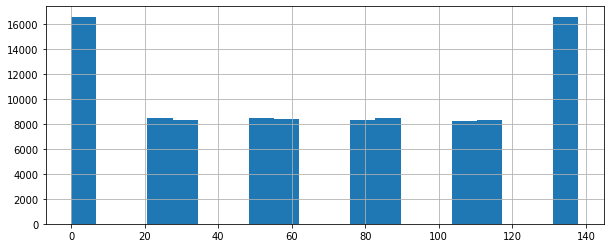

In [32]:
df1["product"].hist(figsize=(10, 4), bins=20)
plt.show()

In [33]:
#Features excluding 'exited'
features1 = df1.drop(['product', 'id'], axis=1)

In [34]:
#Target
target1 = df1["product"]

In [35]:
# División de datos en conjuntos de entrenamiento y validación
random_state = 200

X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(features1,
                                                    target1,
                                                    test_size=0.25,
                                                    random_state=random_state+1)

In [36]:
#Definiendo y entrenando el modelo
linear_model_1 = LinearRegression(fit_intercept = True)
linear_model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [37]:
# Predicción
linear_predictions_1 = linear_model_1.predict(X_1_valid)
linear_predictions_1_series = pd.Series(linear_predictions_1)

In [38]:
print(f"""
Volumen promedio de las reservas: {round(df1["product"].mean(), 4)}
""")
print(f"""
Linear Model RMSE: {round(mean_squared_error(y_1_valid, linear_predictions_1)**(1/2), 4)}
""")


Volumen promedio de las reservas: 68.825


Linear Model RMSE: 0.8905



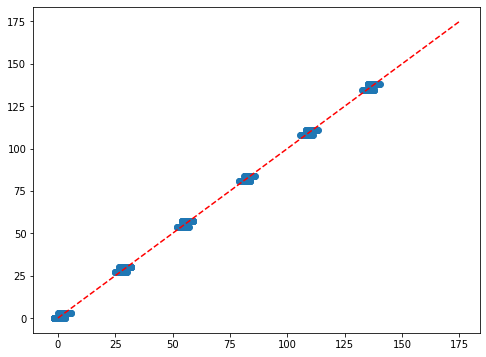

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(x=linear_predictions_1, y=y_1_valid)
plt.plot([0, 175], [0, 175], color="red", ls="--")
plt.show()
# predicciones vs valor verdadero, y es recta en promedio le estamos pegando al valor verdadero

In [40]:
0.8878 / 68.825 * 100

1.2899382491827098

**Conclusión intermedia**
 - El RMSE es bajo, en un 1% aprox. al valor medio del target. 
 - En el gráfico se aprecia que las predicciones se ajustan  al valor verdadero.
 
 [Volver a Contenidos](#back)

### **Modelo LR - Región 3**

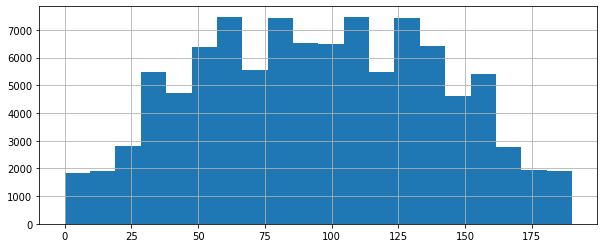

In [41]:
df2["product"].hist(figsize=(10, 4), bins=20)
plt.show()

In [42]:
#Features excluding 'exited'
features2 = df2.drop(['product', 'id'], axis=1)

In [43]:
#Target
target2 = df2["product"]

In [44]:
# División de datos en conjuntos de entrenamiento y validación
random_state = 200

X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(features2,
                                                    target2,
                                                    test_size=0.25,
                                                    random_state=random_state+1)

In [45]:
#Definiendo y entrenando el modelo
linear_2_model = LinearRegression()
linear_2_model.fit(X_2_train, y_2_train)

LinearRegression()

In [46]:
# Predicción
linear_predictions_2 = linear_2_model.predict(X_2_valid)
linear_predictions_2_series = pd.Series(linear_predictions_2)

In [47]:
print(f"""
Volumen promedio de las reservas: {round(df2["product"].mean(), 4)}
""")
print(f"""
Linear Model RMSE: {round(mean_squared_error(y_2_valid, linear_predictions_2)**(1/2), 4)}
""")


Volumen promedio de las reservas: 95.0


Linear Model RMSE: 40.0231



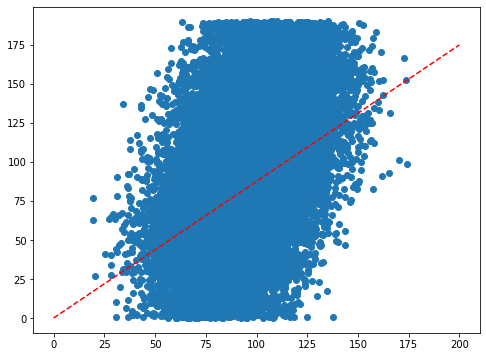

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(x=linear_predictions_2, y=y_2_valid)
plt.plot([0, 200], [0, 175], color="red", ls="--")
plt.show()
# predicciones vs valor verdadero, y es recta en promedio le estamos pegando al valor verdadero2

In [49]:
40.1925 / 95 * 100

42.30789473684211

**Conclusión intermedia**
 - El RMSE es alto, en un 42% aprox. al valor medio del target. 
 - En el gráfico se aprecia que las predicciones se ajustan poco al valor verdadero.
 
 [Volver a Contenidos](#back)

## Prepárando el cálculo para las ganancias <a id='preparando_el_cálculo_para_las_ganancias'></a>

In [50]:
# Valores claves
pozos = 200               # 200 pozozs petrolíferos
inversión = 100000000     # USD - $/200 pozos petrolíferos
producción_min = 500000   # USD - $/pozos petrolíferos / costo promedio por pozo
barril = 4.5              # USD - un barril = 4.5 USD ingresos
unid_prod = 4500          # USD - una unidad de producto (1000 barriles) = 4,500 USD
unid_a_prod = 111.1       # unid - número de unidades requeridas por pozo para generar ganancias positivas

In [51]:
# costo promedio por pozo
costo_prom_pozo = inversión / pozos
costo_prom_pozo

500000.0

In [52]:
# volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas
vol_reservas = costo_prom_pozo / unid_prod
round(vol_reservas, 4)

111.1111

Para cubrir el costo de 1.000Mayor a 112 unid

In [53]:
# promedio de unidades por pozo en la región 0
df0["product"].mean()

92.50000000000001

In [54]:
# promedio de unidades por pozo en la región 1
df1["product"].mean()

68.82500000000002

In [55]:
# promedio de unidades por pozo en la región 2
df2["product"].mean()

95.00000000000004

**Conclusión intermedia**

 - Para cubrir 100.000.000 USD, se requiere que la suma de los 200 mejores pozos a producir sea mayor a 111 unidades por región. Y encontrar los mejores pozos para que el promedio de pozo por región quede por encima de las reservas suficientes.
 - Para el calculo de las ganancias, tendremos en cuenta la inversión, los 200 pozos y el precio por la unidad de producto.

 [Volver a Contenidos](#back)

## Ganancia de los 200 pozos <a id='ganancia_de_los_200_pozos'></a>

In [56]:
y_0_valid = y_0_valid.reset_index(drop = True)
y_1_valid = y_1_valid.reset_index(drop = True)
y_2_valid = y_2_valid.reset_index(drop = True)

In [57]:
CONSTANTS = {
   "top_n": 200,
   "cost": 100_000_000,
   "price_per_unit": 4_500,
}

def compute_profit_from_predictions(preds, target_valid, constants=CONSTANTS):
   
   top_n_preds = preds.sort_values(ascending=False).head(constants["top_n"])
   top_n_target = target_valid.loc[top_n_preds.index]
   revenue = top_n_target.sum() * CONSTANTS["price_per_unit"]
   profit = revenue - CONSTANTS["cost"]

   return profit

**Región 1**

In [58]:
beneficio_región_1 = round(compute_profit_from_predictions(linear_predictions_0_series, y_0_valid, constants=CONSTANTS), 4)
beneficio_región_1

34421194.3484

**Región 2**

In [59]:
beneficio_región_2 = round(compute_profit_from_predictions(linear_predictions_1_series, y_1_valid, constants=CONSTANTS), 4)
beneficio_región_2

24150866.9668

**Región 3**

In [60]:
beneficio_región_3 = round(compute_profit_from_predictions(linear_predictions_2_series, y_2_valid, constants=CONSTANTS), 4)
beneficio_región_3

23877056.8436

**Conclusión intermedia**
 - Se sugiere la **región uno** para el desarrollo de los pozos, ya que tiene una ganacia de 38.843.086 millones de USD aprox.
 
 [Volver a Contenidos](#back)

## Calculo de riesgos y ganancias para cada región <a id='calculo_de_riesgos_y_ganancias_para_cada_región'></a>

### **Riesgos y ganancia - Región 1**

In [61]:
df0["predictions0"] = linear_predictions_0_series

In [62]:
#all_predictions = linear_0_model.predict(features0)

#df0["predictions0"] = all_predictions

In [63]:
#no poner product sino la predicción que hace el modelo
n_iters = 1000
benefits0 = []

for n in range(n_iters):
  bootstrap_sample = y_0_valid.sample(n=500, replace=True)
  preds_sample = linear_predictions_0_series.loc[bootstrap_sample.index]
  profit = compute_profit_from_predictions(preds_sample, bootstrap_sample)

  benefits0.append(profit)

benefits0 = pd.Series(benefits0)

# valor a comparar con cada región para escoger la mejor región
benefits0_mean = benefits0.mean()

#intervalo de confianza
benefits0_min = benefits0.quantile(0.025)
benefits0_max = benefits0.quantile(0.975)

#Riesgo R1
riesgo = (benefits0 < 0).mean()

In [64]:
benefits0

print(f"""
Beneficio región 1 (mean): {round(benefits0_mean, 4)}
""")
print(f"""
Beneficio min. región 1: {round(benefits0_min, 4)}
""")
print(f"""
Beneficio max. región 1: {round(benefits0_max, 4)}
""")
print(f"""
Riesgo región 1: {riesgo}
""")


Beneficio región 1 (mean): 6536174.3361


Beneficio min. región 1: 906528.4692


Beneficio max. región 1: 12728818.572


Riesgo región 1: 0.009



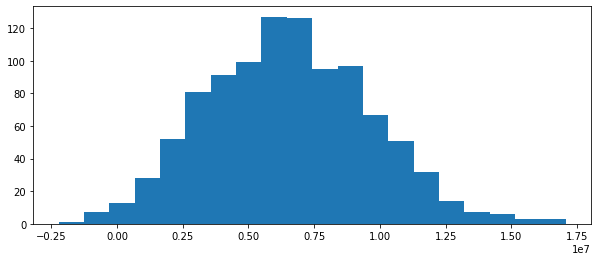

In [65]:
plt.figure(figsize=(10, 4))
plt.hist(x=benefits0, bins=20)
plt.show()

In [66]:
# porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits0) < 0).mean()

0.009

### **Riesgos y ganancia - Región 2**

In [67]:
df1["predictions1"] = linear_predictions_1_series

In [78]:
bootstrap_sample = y_1_valid.sample(n=500, replace=True)
preds_sample = linear_predictions_1_series.loc[bootstrap_sample.index]
profit = compute_profit_from_predictions(preds_sample, bootstrap_sample)

In [68]:
#no poner product sino la predicción que hace el modelo
n_iters = 1000
benefits1 = []

for n in range(n_iters):
  bootstrap_sample = y_1_valid.sample(n=500, replace=True)
  preds_sample = linear_predictions_1_series.loc[bootstrap_sample.index]
  profit = compute_profit_from_predictions(preds_sample, bootstrap_sample)

  benefits1.append(profit)

benefits1 = pd.Series(benefits1)

# valor a comparar con cada región para escoger la mejor región
benefits1_mean = benefits1.mean()

#intervalo de confianza
benefits1_min = benefits1.quantile(0.025)
benefits1_max = benefits1.quantile(0.975)

#Riesgo
riesgo1 = (benefits1 < 0).mean()

In [69]:
benefits1

print(f"""
Beneficio región 2 (mean): {round(benefits1_mean, 4)}
""")
print(f"""
Beneficio min. región 2: {round(benefits1_min, 4)}
""")
print(f"""
Beneficio max. región 2: {round(benefits1_max, 4)}
""")
print(f"""
Riesgo región 2: {riesgo1}
""")


Beneficio región 2 (mean): 6898347.4785


Beneficio min. región 2: 2220263.1954


Beneficio max. región 2: 12497215.0776


Riesgo región 2: 0.003



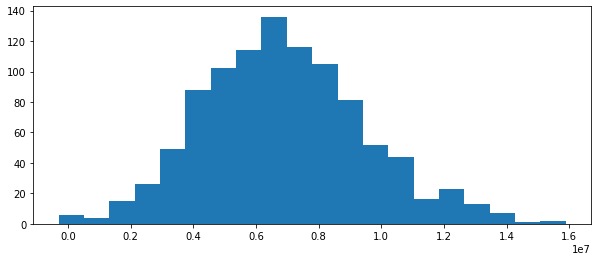

In [70]:
plt.figure(figsize=(10, 4))
plt.hist(x=benefits1, bins=20)
plt.show()

In [71]:
# porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits1) < 100000000).mean()

1.0

### **Riesgos y ganancia -  Región 3**

In [72]:
df2["predictions2"] = linear_predictions_2_series

In [73]:
#no poner product sino la predicción que hace el modelo
n_iters = 1000
benefits2 = []

for n in range(n_iters):
  bootstrap_sample = y_2_valid.sample(n=500, replace=True)
  preds_sample = linear_predictions_2_series.loc[bootstrap_sample.index]
  profit = compute_profit_from_predictions(preds_sample, bootstrap_sample)

  benefits2.append(profit)

benefits2 = pd.Series(benefits2)

# valor a comparar con cada región para escoger la mejor región
benefits2_mean = benefits2.mean()

#intervalo de confianza
benefits2_min = benefits2.quantile(0.025)
benefits2_max = benefits2.quantile(0.975)

#Riesgo
riesgo2 = (benefits2 < 0).mean()

In [74]:
benefits2

print(f"""
Beneficio región 3 (mean): {round(benefits2_mean, 4)}
""")
print(f"""
Beneficio min. región 3: {round(benefits2_min, 4)}
""")
print(f"""
Beneficio max. región 3: {round(benefits2_max, 4)}
""")
print(f"""
Riesgo región 3: {riesgo2}
""")


Beneficio región 3 (mean): 6174096.0186


Beneficio min. región 3: 145079.8504


Beneficio max. región 3: 12352546.227


Riesgo región 3: 0.025



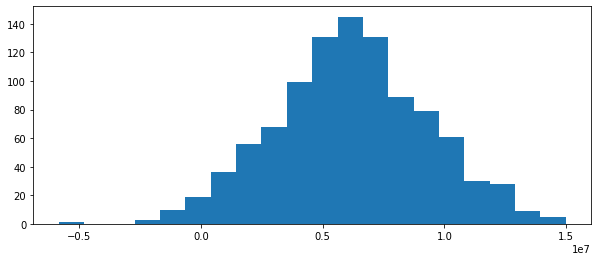

In [75]:
plt.figure(figsize=(10, 4))
plt.hist(x=benefits2, bins=20)
plt.show()

In [76]:
# porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits2) < 100000000).mean()

1.0

**Tabla resumen**

In [77]:
data = {
    "Región": ["Región 1","Región 2","Región 3"],
    "Beneficio (mean)": ["6.584.360,66", "6.819.909,76", "6.584.360.66"], 
    "Beneficio min.": ["672.629,25", "1.652.549,77", "470.117,18"],
    "Beneficio max.": ["12.909.616,35", "12.205.046,91", "12.673.316,41"],
    "Riesgo (%)": ["15", "2", "23"]
}

df4 = pd.DataFrame(data)
df4

,Región,Beneficio (mean),Beneficio min.,Beneficio max.,Riesgo (%)
0,Región 1,"6.584.360,66","672.629,25","12.909.616,35",15
1,Región 2,"6.819.909,76","1.652.549,77","12.205.046,91",2
2,Región 3,6.584.360.66,"470.117,18","12.673.316,41",23


**Conclusión intermedia**
 - La región para el desarrollo de pozos petroleros seria la **región dos** ya que tiene un beneficio de 6.819.910 millones USD aprox., estando por encima de las regiones uno y tres. También, tiene el porcentaje de riesgo más bajo con un 2%.
 
[Volver a Contenidos](#back)

## Conclusión general <a id='end'></a>

- Los tres DataFrame tienen 5 columnas, 100.000 filas. Sin valores ausentes, ni duplicados,
- La región con el RMSE más bajo es el número dos,
- Se sugiere la región uno para el desarrollo de los pozos, ya que tiene una ganancia de 34.421.194,4 millones de USD aprox. Sin embargo, al aplicar bootstrapping, la región que proporciona el mayor beneficio total para los pozos de petróleo es la región dos con una ganancia de 6.819.910 millones USD aprox.

[Volver a Contenidos](#back)